In [3]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import requests
import sqlite3
import json

In [4]:
con = sqlite3.connect("database.sqlite")
cur = con.cursor()


# Loading the Data from SQL

In [5]:
cur.execute("""Select * 
               From Matches
;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


# selecting Season 2011 Games only

In [7]:
cur.execute("""Select * 
               From Matches
               Where Season = 2011
;""")
df1 = pd.DataFrame(cur.fetchall())
df1.columns = [x[0] for x in cur.description]
df1.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


# Selecting on Season 2011 and German Bundesliga only

In [13]:
cur.execute("""Select * 
               From Matches
               Where Season = '2011'
               And ((Div = 'D1' OR Div = 'D2'))
;""")
df1 = pd.DataFrame(cur.fetchall())
df1.columns = [x[0] for x in cur.description]
df1.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


# Performing Groupby And Arithmetic Manipulations

In [34]:
cur.execute("""select HomeTeam,Div, count(Matches.Match_ID)NoOfGames, sum(Matches.FTHG) HomeGoals,
               sum(Matches.FTAG) AwayGoals, sum(case Matches.FTR WHEN 'A' then 1 else 0 end) AwayWins,
               sum(case Matches.FTR when 'H' then 1 else 0 end) HomeWins, sum(case Matches.FTR when 'D' 
               then 1 else 0 end) 
               From Matches
               Where Season = 2011 and Div in ('D1', 'D2')
               Group by HomeTeam , Div ;""")
df1 = pd.DataFrame(cur.fetchall())
df1.columns = [x[0] for x in cur.description]
df1.head()

,HomeTeam,Div,NoOfGames,HomeGoals,AwayGoals,AwayWins,HomeWins,Draws
0,Aachen,D2,17,15,24,7,4,6
1,Augsburg,D1,17,20,19,4,6,7
2,Bayern Munich,D1,17,49,6,2,14,1
3,Bochum,D2,17,23,23,7,7,3
4,Braunschweig,D2,17,21,15,3,6,8


# Creating a New Column for Total Goals in Season 2011 - German League

In [47]:
df1['Total_Goals'] = df1.apply(lambda x : x['HomeGoals'] + x['AwayGoals'] , axis = 1)

# checking results

In [48]:
df1.head()

,HomeTeam,Div,FTR,NoOfGames,HomeGoals,AwayGoals,AwayWins,HomeWins,Draws,Total_Goals
0,Aachen,D2,D,17,15,24,7,4,6,39
1,Augsburg,D1,A,17,20,19,4,6,7,39
2,Bayern Munich,D1,H,17,49,6,2,14,1,55
3,Bochum,D2,D,17,23,23,7,7,3,46
4,Braunschweig,D2,D,17,21,15,3,6,8,36


In [ ]:
# #Calculating losses team wise when playing away and home using Pandas instead of SQL

# Away_losses = df1[df1['FTR'] == 'A']['HomeTeam'].value_counts()
# Home_losses = df1[df1['FTR'] == 'H']['AwayTeam'].value_counts()
# Home_wins = df1[df1['FTR'] == 'H']['HomeTeam'].value_counts()

# #Creating dataframe to save losses
# Total_Losses = pd.DataFrame(data = (Away_losses + Home_losses)).reset_index()
# Total_Losses.columns = ['Team', 'Season Losses']
# Total_Losses['Season Losses'].fillna(0, inplace=True)

# # Merging wins and losses dataframes
# Win_Loss = Wins.merge(Total_Losses, how='inner', on = 'Team')
# Win_Loss.sort_values('Season Wins', ascending=False, inplace=True)

In [ ]:
#Writing NewQueries based on FTR column on this Query for HomeTeam AND Away Teams as Below

In [164]:
cur.execute("""Select * 
               From Matches
               Where Season = '2011'
               And ((Div = 'D1' OR Div = 'D2'))
               Group By HomeTeam ,Div
;""")
df1 = pd.DataFrame(cur.fetchall())
df1.columns = [x[0] for x in cur.description]
df1.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1702,D2,2011,2011-08-27,Aachen,Fortuna Dusseldorf,0,0,D
1,1650,D1,2011,2011-08-20,Augsburg,Hoffenheim,0,2,A
2,1643,D1,2011,2012-03-10,Bayern Munich,Hoffenheim,7,1,H
3,1700,D2,2011,2011-12-10,Bochum,Fortuna Dusseldorf,1,1,D
4,1694,D2,2011,2011-10-03,Braunschweig,Fortuna Dusseldorf,1,1,D


# German HomeTeam Stats

In [175]:
cur.execute("""select HomeTeam,Div, count(Matches.Match_ID)NoOfGames, sum(Matches.FTHG) GoalsAtHome,
               sum(Matches.FTAG) GoalsAgainstAtHome, sum(case Matches.FTR WHEN 'A' then 1 else 0 end) HomeTeamLoss,
               sum(case Matches.FTR when 'H' then 1 else 0 end) HomeTeamWon, sum(case Matches.FTR when 'D' 
               then 1 else 0 end)DrawHome
               From Matches
               Where Season = 2011 and Div in ('D1', 'D2')
               Group by HomeTeam , Div ;""")
dfHomeTeam = pd.DataFrame(cur.fetchall())
dfHomeTeam.columns = [x[0] for x in cur.description]
dfHomeTeam.head()

,HomeTeam,Div,NoOfGames,GoalsAtHome,GoalsAgainstAtHome,HomeTeamLoss,HomeTeamWon,DrawHome
0,Aachen,D2,17,15,24,7,4,6
1,Augsburg,D1,17,20,19,4,6,7
2,Bayern Munich,D1,17,49,6,2,14,1
3,Bochum,D2,17,23,23,7,7,3
4,Braunschweig,D2,17,21,15,3,6,8


# German AwayTeam Stats

In [169]:
cur.execute("""Select AwayTeam , Div , count(Matches.Match_ID)NoOfGames , sum(Matches.FTAG) GoalsFor , 
               sum(Matches.FTHG) GoalsAgainst , sum(case Matches.FTR WHEN 'A' then 1 else 0 end) WonAway , 
               sum(case Matches.FTR WHEN 'H' then 1 else 0 end) LostAway , sum(case Matches.FTR when 'D' then
               1 else 0 end) DrewAway
               FROM Matches
               WHERE Season = 2011 And Div in ('D1' , 'D2')
               Group BY AwayTeam , Div
 ;""")
dfAwayTeam = pd.DataFrame(cur.fetchall())
dfAwayTeam.columns = [x[0] for x in cur.description]
dfAwayTeam.head()

,AwayTeam,Div,NoOfGames,GoalsFor,GoalsAgainst,WonAway,LostAway,DrewAway
0,Aachen,D2,17,15,23,2,8,7
1,Augsburg,D1,17,16,30,2,8,7
2,Bayern Munich,D1,17,28,16,9,5,3
3,Bochum,D2,17,18,32,3,10,4
4,Braunschweig,D2,17,16,20,4,6,7


# Merging the Two DataFrames

In [176]:
dfTeams = pd.merge(dfHomeTeam , dfAwayTeam , right_on = 'AwayTeam' , how = 'inner' , left_on = 'HomeTeam') 

In [177]:
#Checking Results
dfTeams.head() 

,HomeTeam,Div_x,NoOfGames_x,GoalsAtHome,GoalsAgainstAtHome,HomeTeamLoss,HomeTeamWon,DrawHome,AwayTeam,Div_y,NoOfGames_y,GoalsFor,GoalsAgainst,WonAway,LostAway,DrewAway
0,Aachen,D2,17,15,24,7,4,6,Aachen,D2,17,15,23,2,8,7
1,Augsburg,D1,17,20,19,4,6,7,Augsburg,D1,17,16,30,2,8,7
2,Bayern Munich,D1,17,49,6,2,14,1,Bayern Munich,D1,17,28,16,9,5,3
3,Bochum,D2,17,23,23,7,7,3,Bochum,D2,17,18,32,3,10,4
4,Braunschweig,D2,17,21,15,3,6,8,Braunschweig,D2,17,16,20,4,6,7


# Subsetting Specific Columns

In [179]:
dfTeams = pd.merge(dfHomeTeam, dfAwayTeam[['GoalsFor','GoalsAgainst','WonAway' ,'LostAway', 'DrewAway' , 'AwayTeam']] , right_on = 'AwayTeam' , how = 'inner' , left_on = 'HomeTeam') 

In [180]:
dfTeams.head()

,HomeTeam,Div,NoOfGames,GoalsAtHome,GoalsAgainstAtHome,HomeTeamLoss,HomeTeamWon,DrawHome,GoalsFor,GoalsAgainst,WonAway,LostAway,DrewAway,AwayTeam
0,Aachen,D2,17,15,24,7,4,6,15,23,2,8,7,Aachen
1,Augsburg,D1,17,20,19,4,6,7,16,30,2,8,7,Augsburg
2,Bayern Munich,D1,17,49,6,2,14,1,28,16,9,5,3,Bayern Munich
3,Bochum,D2,17,23,23,7,7,3,18,32,3,10,4,Bochum
4,Braunschweig,D2,17,21,15,3,6,8,16,20,4,6,7,Braunschweig


# Dropping Extra Columns Created from Merge 

In [181]:
dfTeams.drop("AwayTeam" , axis = 1 , inplace = True)

# Renaming Columns

In [186]:
dfTeams.rename(columns = {'HomeTeam':'Team'} , inplace= True)

In [187]:
dfTeams.head()

,Team,Div,NoOfGames,GoalsAtHome,GoalsAgainstAtHome,HomeTeamLoss,HomeTeamWon,DrawHome,GoalsFor,GoalsAgainst,WonAway,LostAway,DrewAway
0,Aachen,D2,17,15,24,7,4,6,15,23,2,8,7
1,Augsburg,D1,17,20,19,4,6,7,16,30,2,8,7
2,Bayern Munich,D1,17,49,6,2,14,1,28,16,9,5,3
3,Bochum,D2,17,23,23,7,7,3,18,32,3,10,4
4,Braunschweig,D2,17,21,15,3,6,8,16,20,4,6,7


# Creating Visualizations to show  Wins and Loss For Both English Premier
# League Teams And German Bundesliga

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

In [104]:
cur.execute("""SELECT a.AwayTeam as Team,
                    a.Away_Goals,
                    b.Home_Goals,
                    SUM(a.Away_Goals + b.Home_Goals) AS Total_Goals,
                    a.Away_Wins, b.Home_Wins, SUM(a.Away_Wins + b.Home_Wins) AS Total_Wins,
                    a.Away_Draw, b.Home_Draw, SUM(a.Away_Draw + b.Home_Draw) AS Total_Draws,
                    SUM(a.Num_Games - a.Away_Wins - b.Home_Wins - a.Away_Draw - b.Home_Draw) AS Total_Losses,
                    a.Num_Games
                FROM (SELECT AwayTeam,
                        COUNT(AwayTeam) * 2 AS Num_Games,
                        SUM(FTAG) AS Away_Goals,
                        COUNT(CASE WHEN FTR = "A" THEN 1 ELSE NULL END) AS Away_Wins,
                        COUNT(CASE WHEN FTR = "D" THEN 1 ELSE NULL END) AS Away_Draw
                        FROM Matches
                        WHERE Season = 2011
                        GROUP BY 1) a
                LEFT JOIN
                    (SELECT HomeTeam,
                        SUM(FTHG) AS Home_Goals,
                        COUNT(CASE WHEN FTR = "H" THEN 1 ELSE NULL END) AS Home_Wins,
                        COUNT(CASE WHEN FTR = "D" THEN 1 ELSE NULL END) AS Home_Draw
                        FROM Matches
                        WHERE Season = 2011
                        GROUP BY 1) b
                ON a.AwayTeam = b.HomeTeam
                GROUP BY  ;""")
big_query = pd.DataFrame(cur.fetchall())
big_query.columns = [x[0] for x in cur.description]
big_query.head()

,Team,Away_Goals,Home_Goals,Total_Goals,Away_Wins,Home_Wins,Total_Wins,Away_Draw,Home_Draw,Total_Draws,Total_Losses,Num_Games
0,Aachen,15,15,30,2,4,6,7,6,13,15,34
1,Arsenal,35,39,74,9,12,21,3,4,7,10,38
2,Aston Villa,17,20,37,3,4,7,10,7,17,14,38
3,Augsburg,16,20,36,2,6,8,7,7,14,12,34
4,Bayern Munich,28,49,77,9,14,23,3,1,4,7,34


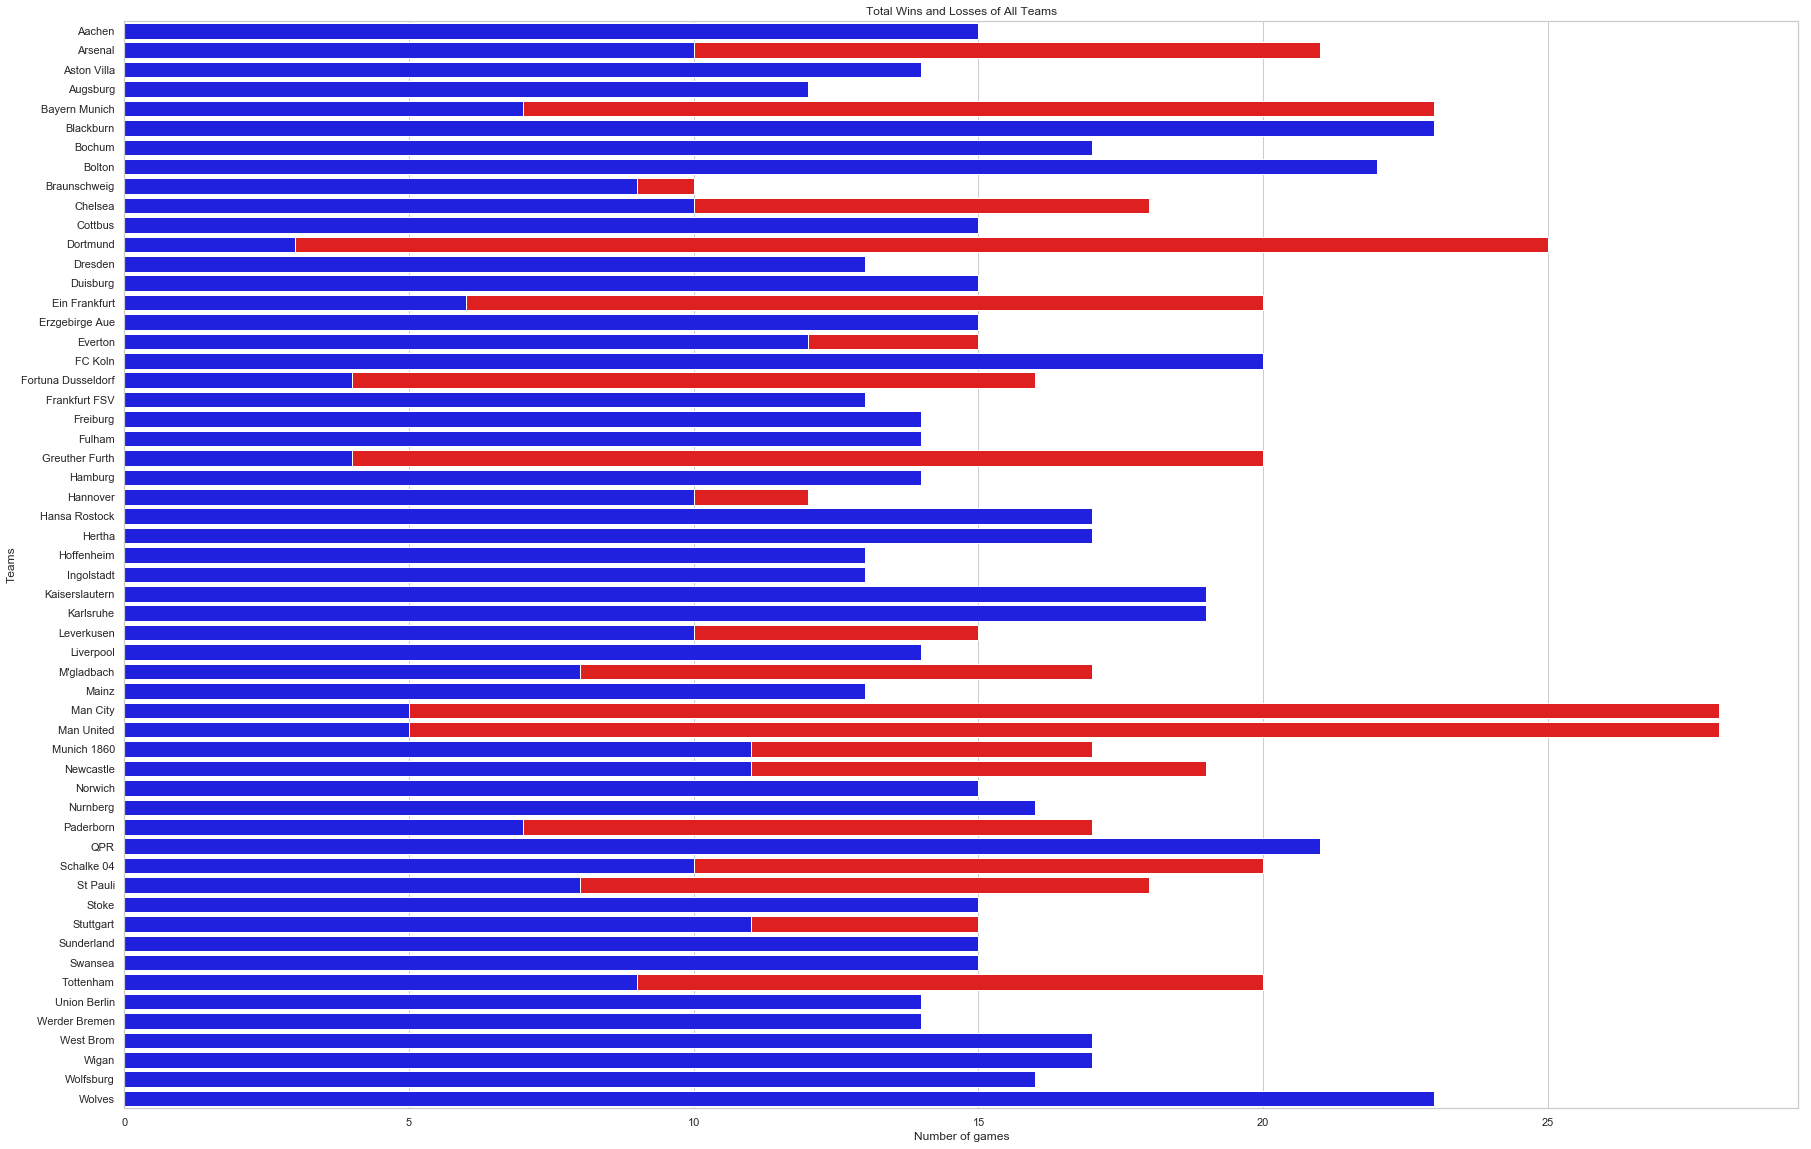

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(30,20))
ax = sns.barplot(x="Total_Wins" , y = "Team", data=big_query , color='red')
ax2 = sns.barplot(x='Total_Losses', y="Team", data=big_query, color ='blue')
plt.xlabel("Number of games")
plt.ylabel("Teams")
plt.title('Total Wins and Losses of All Teams' , fontsize = 12)
plt.show()

In [111]:
big_query.head()

,Team,Away_Goals,Home_Goals,Total_Goals,Away_Wins,Home_Wins,Total_Wins,Away_Draw,Home_Draw,Total_Draws,Total_Losses,Num_Games
0,Aachen,15,15,30,2,4,6,7,6,13,15,34
1,Arsenal,35,39,74,9,12,21,3,4,7,10,38
2,Aston Villa,17,20,37,3,4,7,10,7,17,14,38
3,Augsburg,16,20,36,2,6,8,7,7,14,12,34
4,Bayern Munich,28,49,77,9,14,23,3,1,4,7,34


# Histograms for teams wins and losses

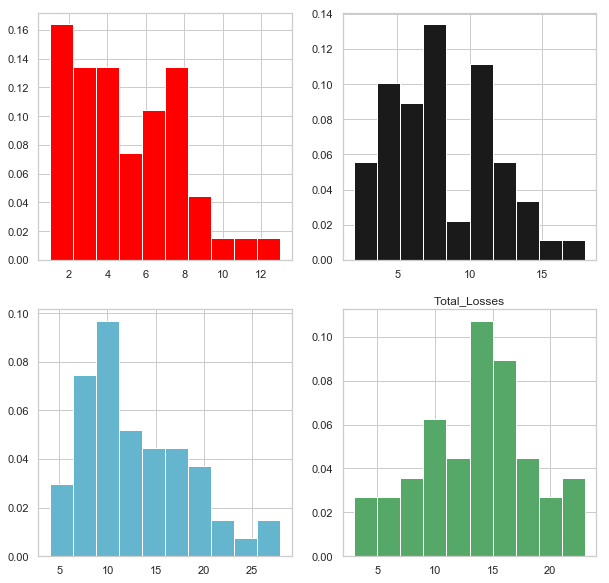

In [136]:
fig, axes = plt.subplots(nrows = 2 , ncols = 2 , figsize= (10,10))
ax0 , ax1 , ax2 , ax3 = axes.flatten()

ax0.hist(big_query['Away_Wins'] , bins = 10 , color = 'red' , density = True)
plt.title('Away_Wins')


ax1.hist(big_query['Home_Wins'] , bins = 10 , color = 'k' , density = True)
plt.title('Home_Wins')



ax2.hist(big_query['Total_Wins'] , bins = 10 , color = 'c' , density = True)
plt.title('Total_wins')


ax3.hist(big_query['Total_Losses'] , bins = 10 , color = 'g' , density = True)
plt.title('Total_Losses')
plt.show()


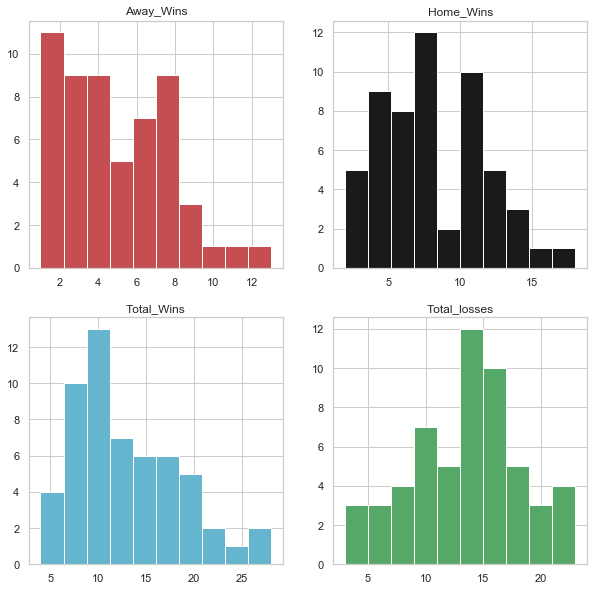

In [158]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.title('Away_Wins')
plt.hist(big_query['Away_Wins'] , bins = 10 , color = 'r')


plt.subplot(222)
plt.title('Home_Wins')
plt.hist(big_query['Home_Wins'] , bins = 10 , color = 'k')

plt.subplot(223)
plt.title('Total_Wins')
plt.hist(big_query['Total_Wins'] , bins = 10 , color = 'c')

plt.subplot(224)
plt.title('Total_losses')
plt.hist(big_query['Total_Losses']  , color = 'g')
plt.savefig('Dashboard.png')


# Now lets groupby total goals and visualizations

In [141]:
total_Team_Goals = big_query.groupby('Team').Total_Goals.sum() 
total_Team_Goals.head()

Team
Aachen           30
Arsenal          74
Aston Villa      37
Augsburg         36
Bayern Munich    77
Name: Total_Goals, dtype: int64

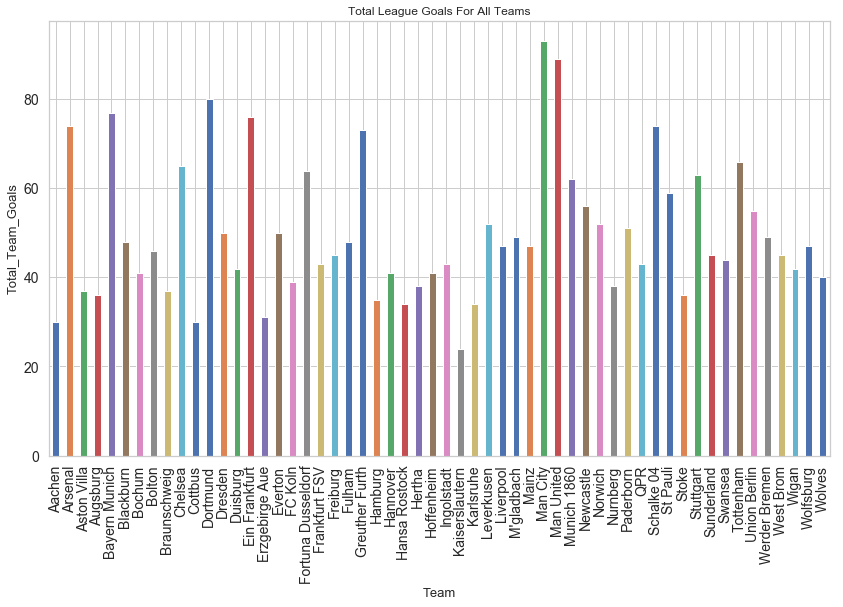

In [143]:
total_Team_Goals.plot(kind = 'bar' , figsize = (14,8) , fontsize = 14)
plt.xlabel("Teams" , fontsize = 13)
plt.ylabel("Total_Team_Goals" , fontsize = 13)
plt.title("Total League Goals For All Teams")
plt.show()

# Now lets put all the dates in a dictionary to be used for the weather getter API

In [67]:
cur.execute("""Select * 
               FROM Matches
               Where Season = 2011
               AND ((Div = 'D1' OR Div = 'D2'))
;""")
df2 = pd.DataFrame(cur.fetchall())
df2.columns = [x[0] for x in cur.description]
df2.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


# putting the dates in a dictionary

In [68]:
Date = list(df2.Date.unique())
len(Date)

136

# Now lets import the weather API and match it with dates where Matches were played

In [ ]:
#Uncomment And Run to initialize the API

# resp = requests.get("https://api.darksky.net/forecast/45c2523a2abba56c9086bf1bd12e36e1/52.5200,13.4050")
# resp.json()

In [70]:
resp = requests.get("https://api.darksky.net/forecast/myapikeygoeshere/52.5200,13.4050,2011-12-11T12:00:00?currently,daily")
result = resp.json()

In [71]:
result.keys()

dict_keys(['latitude', 'longitude', 'timezone', 'currently', 'hourly', 'daily', 'flags', 'offset'])

In [73]:
result['daily'].keys()

dict_keys(['data'])

In [75]:
result['daily']['data'][0]['icon']

'partly-cloudy-day'

In [76]:
for key in result['daily'].keys():
    print(key, type(result['daily'][key]))

data <class 'list'>


# Previewing Weather 

In [77]:
df = pd.DataFrame(result['daily']['data'])
df.head()

,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,apparentTemperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,cloudCover,dewPoint,...,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windGust,windGustTime,windSpeed
0,34.94,1323605040,23.68,1323659100,34.94,1323605040,25.47,1323586860,0.56,29.15,...,32.7,1323588960,1323558000,0,1323601080,6.212,220,15.03,1323561060,9.66


# checking the summary of in the weather API

In [78]:
result['daily']['data'][0]['summary']

'Mostly cloudy throughout the day.'

# Checking to confirm if Timezone Is Berlin

In [79]:
result['timezone']

'Europe/Berlin'

# Now lets import the weather getter And Linking to the Match Dates

In [81]:
weather = WeatherGetter()

weather_report = weather.test_many(Date)

# Note the weather will return a Boolean where when it rains it returns True else False

In [82]:
weather_report

{'2012-03-31': True,
 '2011-12-11': False,
 '2011-08-13': False,
 '2011-11-27': False,
 '2012-02-18': False,
 '2012-01-20': True,
 '2012-02-04': False,
 '2012-04-21': False,
 '2011-09-18': True,
 '2011-10-23': False,
 '2011-10-01': False,
 '2012-03-03': False,
 '2011-08-27': False,
 '2012-03-17': False,
 '2011-11-06': False,
 '2012-05-05': True,
 '2012-04-11': False,
 '2011-12-17': True,
 '2012-02-03': False,
 '2011-10-29': False,
 '2012-01-22': True,
 '2011-12-03': True,
 '2012-04-14': False,
 '2012-03-25': False,
 '2012-03-10': False,
 '2012-04-07': False,
 '2011-11-19': False,
 '2011-10-14': False,
 '2011-09-24': False,
 '2012-04-28': False,
 '2011-12-18': True,
 '2012-03-02': False,
 '2012-03-16': False,
 '2012-02-17': True,
 '2011-08-06': True,
 '2011-11-04': False,
 '2011-09-16': False,
 '2011-07-15': False,
 '2012-05-06': True,
 '2012-02-11': False,
 '2011-10-02': False,
 '2012-03-30': False,
 '2011-10-22': False,
 '2011-08-26': False,
 '2011-08-07': True,
 '2012-02-24': True,
 

# creating a column for dates where it rained

In [84]:
Rain_days = []
for date in df2.Date:
    Rain_days.append(weather_report[date])
    
df2['Rain_days'] = Rain_days  

# Checking Results

In [85]:
df2.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Rain_days
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,True
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,False
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,False
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,False
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,False


# Creating New Columns For Wins , Loss And Draw Matches

In [91]:
df2['wins'] = df2['FTR'].map(lambda x: 1 if x == 'H' else 0)
df2['loss'] = df2['FTR'].map(lambda x : 1 if x == 'A' else 0)
df2['total_match'] =1
df2.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Rain_days,wins,loss,total_match
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,True,0,1,1
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,False,0,1,1
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,False,0,1,1
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,False,1,0,1
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,False,0,0,1


In [89]:
#df1.drop(['wins' , 'loss' , 'total_match'] ,axis = 1, inplace= True)

# Creating new columns for Rain WINS AND RAIN LOSS
# And Assigning Boolean to Wins And Loss

In [94]:
df2['rain_wins'] = 0
df2['rain_loss'] = 0


df2[(df2.wins == 1) & (df2.Rain_days == True)] = df2[(df2.wins == 1) & (df2.Rain_days == True)].assign(rain_wins = 1)

df2[(df2.loss == 1) & (df2.Rain_days == True)] = df2[(df2.loss == 1) & (df2.Rain_days == True)].assign(rain_loss = 1)

# Checking Results

In [95]:
df2.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Rain_days,wins,loss,total_match,rain_wins,rain_loss
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,True,0,1,1,0,1
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,False,0,1,1,0,0
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,False,0,1,1,0,0
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,False,1,0,1,0,0
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,False,0,0,1,0,0


# Groupby Hometeam And Rain_wins and Rain_loss

In [96]:
total_matches = df2.groupby("HomeTeam").sum()
total_matches.head()

,Match_ID,Season,FTHG,FTAG,Rain_days,wins,loss,total_match,rain_wins,rain_loss
HomeTeam,,,,,,,,,,
Aachen,24768,34187,15,24,2.0,4,7,17,0,0
Augsburg,22397,34187,20,19,4.0,6,4,17,3,0
Bayern Munich,22898,34187,49,6,3.0,14,2,17,2,1
Bochum,24898,34187,23,23,3.0,7,7,17,1,2
Braunschweig,24745,34187,21,15,4.0,6,3,17,2,1


# Reseting the index from a Multi_index level for cleaner column representation

In [132]:
total_matches.reset_index(inplace = True)

In [133]:
total_matches.head()

,index,HomeTeam,Match_ID,Season,FTHG,FTAG,Rain_days,wins,loss,total_match,rain_wins,rain_loss,rain_wins_percentage
0,0,Aachen,24768,34187,15,24,2.0,4,7,17,0,0,0
1,1,Augsburg,22397,34187,20,19,4.0,6,4,17,3,0,100
2,2,Bayern Munich,22898,34187,49,6,3.0,14,2,17,2,1,66
3,3,Bochum,24898,34187,23,23,3.0,7,7,17,1,2,33
4,4,Braunschweig,24745,34187,21,15,4.0,6,3,17,2,1,66


# Finding the HomeTeam win Percentage

In [98]:
#I assinged 0 since finding the % rate of zero will return Nan values for zeros in some columns

def win_percentage(win, loss):
    if win==0:
        return 0
    else:
        total = win + loss
        return ((win/total)*100).round(2)
  

# creating a new column for Percentage of Rain Wins

In [99]:
total_matches['rain_wins_percentage'] = 0

# Checking Result

In [100]:
total_matches.head()

,Match_ID,Season,FTHG,FTAG,Rain_days,wins,loss,total_match,rain_wins,rain_loss,rain_wins_percentage
HomeTeam,,,,,,,,,,,
Aachen,24768,34187,15,24,2.0,4,7,17,0,0,0
Augsburg,22397,34187,20,19,4.0,6,4,17,3,0,0
Bayern Munich,22898,34187,49,6,3.0,14,2,17,2,1,0
Bochum,24898,34187,23,23,3.0,7,7,17,1,2,0
Braunschweig,24745,34187,21,15,4.0,6,3,17,2,1,0


# Assigning Percentage of wins to DataFrame 

In [101]:
for i in range(len(total_matches.index)):
    total_matches['rain_wins_percentage'][i] = win_percentage(total_matches['rain_wins'][i]
                                              ,total_matches['rain_loss'][i] )

/Users/flatironschool/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# checking Result

In [125]:
total_matches.head()

,Match_ID,Season,FTHG,FTAG,Rain_days,wins,loss,total_match,rain_wins,rain_loss,rain_wins_percentage
HomeTeam,,,,,,,,,,,
Aachen,24768,34187,15,24,2.0,4,7,17,0,0,0
Augsburg,22397,34187,20,19,4.0,6,4,17,3,0,100
Bayern Munich,22898,34187,49,6,3.0,14,2,17,2,1,66
Bochum,24898,34187,23,23,3.0,7,7,17,1,2,33
Braunschweig,24745,34187,21,15,4.0,6,3,17,2,1,66


# Deploying Assignment on to Pymongo DataBase Cloud

In [195]:
import pymongo
import json

In [193]:
myclient =  pymongo.MongoClient('mongodb://127.0.0.1:27017/')
mydb = myclient['Delphi_Football_Analysis']


In [204]:
myclient.list_database_names()

['Delphi_Football_Analysis', 'admin', 'config', 'example_data', 'local']

In [196]:
total_matches_json = total_matches.T.to_json()
total_matches_list= json.loads(total_matches_json).values()


# Checking Results

In [199]:
print(total_matches_json)

{"0":{"index":0,"HomeTeam":"Aachen","Match_ID":24768,"Season":34187,"FTHG":15,"FTAG":24,"Rain_days":2.0,"wins":4,"loss":7,"total_match":17,"rain_wins":0,"rain_loss":0,"rain_wins_percentage":0},"1":{"index":1,"HomeTeam":"Augsburg","Match_ID":22397,"Season":34187,"FTHG":20,"FTAG":19,"Rain_days":4.0,"wins":6,"loss":4,"total_match":17,"rain_wins":3,"rain_loss":0,"rain_wins_percentage":100},"2":{"index":2,"HomeTeam":"Bayern Munich","Match_ID":22898,"Season":34187,"FTHG":49,"FTAG":6,"Rain_days":3.0,"wins":14,"loss":2,"total_match":17,"rain_wins":2,"rain_loss":1,"rain_wins_percentage":66},"3":{"index":3,"HomeTeam":"Bochum","Match_ID":24898,"Season":34187,"FTHG":23,"FTAG":23,"Rain_days":3.0,"wins":7,"loss":7,"total_match":17,"rain_wins":1,"rain_loss":2,"rain_wins_percentage":33},"4":{"index":4,"HomeTeam":"Braunschweig","Match_ID":24745,"Season":34187,"FTHG":21,"FTAG":15,"Rain_days":4.0,"wins":6,"loss":3,"total_match":17,"rain_wins":2,"rain_loss":1,"rain_wins_percentage":66},"5":{"index":5,"Hom

In [200]:
print(total_matches_list)

dict_values([{'index': 0, 'HomeTeam': 'Aachen', 'Match_ID': 24768, 'Season': 34187, 'FTHG': 15, 'FTAG': 24, 'Rain_days': 2.0, 'wins': 4, 'loss': 7, 'total_match': 17, 'rain_wins': 0, 'rain_loss': 0, 'rain_wins_percentage': 0}, {'index': 1, 'HomeTeam': 'Augsburg', 'Match_ID': 22397, 'Season': 34187, 'FTHG': 20, 'FTAG': 19, 'Rain_days': 4.0, 'wins': 6, 'loss': 4, 'total_match': 17, 'rain_wins': 3, 'rain_loss': 0, 'rain_wins_percentage': 100}, {'index': 2, 'HomeTeam': 'Bayern Munich', 'Match_ID': 22898, 'Season': 34187, 'FTHG': 49, 'FTAG': 6, 'Rain_days': 3.0, 'wins': 14, 'loss': 2, 'total_match': 17, 'rain_wins': 2, 'rain_loss': 1, 'rain_wins_percentage': 66}, {'index': 3, 'HomeTeam': 'Bochum', 'Match_ID': 24898, 'Season': 34187, 'FTHG': 23, 'FTAG': 23, 'Rain_days': 3.0, 'wins': 7, 'loss': 7, 'total_match': 17, 'rain_wins': 1, 'rain_loss': 2, 'rain_wins_percentage': 33}, {'index': 4, 'HomeTeam': 'Braunschweig', 'Match_ID': 24745, 'Season': 34187, 'FTHG': 21, 'FTAG': 15, 'Rain_days': 4.0,

In [201]:
col = mydb['Bundesliga']

In [202]:
col

Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'Delphi_Football_Analysis'), 'Bundesliga')

In [203]:
col.insert_many(total_matches_list)